In [7]:
import csv

# Define the CSV file path
csv_file = 'C:\\Users\\leona\\Documents\\Coding the humanities\\Prosperity game\\island-data-bottle-round-1\\prices_round_1_day_-2.csv'

# Create an empty list to store the data
data = []

# Open the CSV file and read the rows
with open(csv_file, 'r') as file:
    reader = csv.reader(file, delimiter=';')
    next(reader)  # skip the header row
    for row in reader:
        # Split the columns and store the values in a dictionary
        item = {
            'day': row[0],
            'timestamp': row[1],
            'product': row[2],
            'bid_price_1': row[3],
            'bid_volume_1': row[4],
            'bid_price_2': row[5],
            'bid_volume_2': row[6],
            'bid_price_3': row[7],
            'bid_volume_3': row[8],
            'ask_price_1': row[9],
            'ask_volume_1': row[10],
            'ask_price_2': row[11],
            'ask_volume_2': row[12],
            'ask_price_3': row[13],
            'ask_volume_3': row[14],
            'mid_price': row[15],
            'profit_and_loss': row[16],
        }
        
        # Append the dictionary to the data list
        data.append(item)

# Print the first 5 items in the data list
print(data[:10])


[{'day': '-2', 'timestamp': '0', 'product': 'BANANAS', 'bid_price_1': '4997', 'bid_volume_1': '26', 'bid_price_2': '', 'bid_volume_2': '', 'bid_price_3': '', 'bid_volume_3': '', 'ask_price_1': '5003', 'ask_volume_1': '26', 'ask_price_2': '', 'ask_volume_2': '', 'ask_price_3': '', 'ask_volume_3': '', 'mid_price': '5000.0', 'profit_and_loss': '0.0'}, {'day': '-2', 'timestamp': '0', 'product': 'PEARLS', 'bid_price_1': '9996', 'bid_volume_1': '1', 'bid_price_2': '9995', 'bid_volume_2': '25', 'bid_price_3': '', 'bid_volume_3': '', 'ask_price_1': '10004', 'ask_volume_1': '1', 'ask_price_2': '10005', 'ask_volume_2': '25', 'ask_price_3': '', 'ask_volume_3': '', 'mid_price': '10000.0', 'profit_and_loss': '0.0'}, {'day': '-2', 'timestamp': '100', 'product': 'BANANAS', 'bid_price_1': '4997', 'bid_volume_1': '20', 'bid_price_2': '', 'bid_volume_2': '', 'bid_price_3': '', 'bid_volume_3': '', 'ask_price_1': '4998', 'ask_volume_1': '1', 'ask_price_2': '5004', 'ask_volume_2': '20', 'ask_price_3': '', 

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [22]:
def makegraphplot(csvdirectory):
    # read the csv file
    df = pd.read_csv(csvdirectory, delimiter=';')
    
    # filter the data to only include rows where the product is "BANANAS"
    df = df[df['product'] == 'BANANAS']

    # group the data by timestamp and calculate the average mid price
    grouped = df.groupby('timestamp')['mid_price'].mean()

    # convert the timestamp column to a datetime object
    df['timestamp'] = pd.to_datetime(df['timestamp'])

    # create a figure and axis
    fig, ax = plt.subplots()

    # plot the data
    ax.plot(df['timestamp'], df['mid_price'], label='Mid Price')

    # set the title and axis labels
    ax.set_title('Mid Price over Time for Bananas')
    ax.set_xlabel('Timestamp')
    ax.set_ylabel('Mid Price')

    # rotate the x-axis tick labels for better readability
    plt.xticks(rotation=45)

    # show the legend
    ax.legend()

    # show the plot
    plt.show()


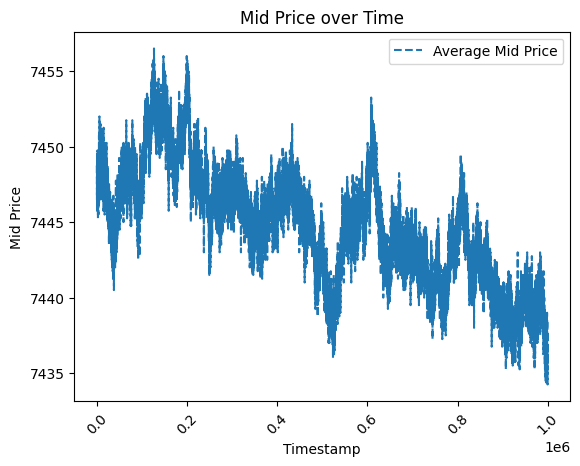

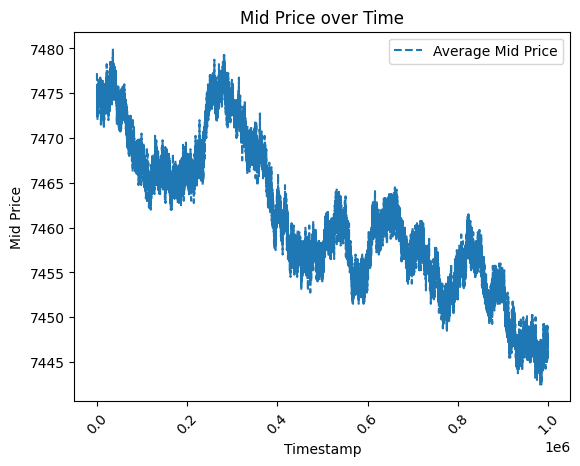

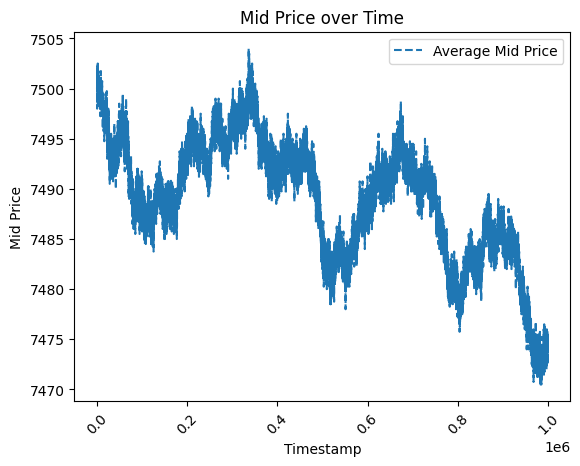

In [25]:
makegraphplot("C:\\Users\\leona\\Documents\\Coding the humanities\\Prosperity game\\island-data-bottle-round-1\\prices_round_1_day_0.csv")
makegraphplot("C:\\Users\\leona\\Documents\\Coding the humanities\\Prosperity game\\island-data-bottle-round-1\\prices_round_1_day_-1.csv")
makegraphplot("C:\\Users\\leona\\Documents\\Coding the humanities\\Prosperity game\\island-data-bottle-round-1\\prices_round_1_day_-2.csv")

In [20]:
def makegraphplot(csvdirectory):
    # read the csv file
    df = pd.read_csv(csvdirectory, delimiter=';')
    
    # filter the data to only include rows where the product is "BANANAS"
    df = df[df['product'] == 'BANANAS']

    # calculate the average true range (ATR) for the lookback period of 10
    df['high-low'] = df['high_price'] - df['low_price']
    df['high-pc'] = abs(df['high_price'] - df['mid_price'].shift())
    df['low-pc'] = abs(df['low_price'] - df['mid_price'].shift())
    df['TR'] = df[['high-low', 'high-pc', 'low-pc']].max(axis=1)
    ATR = df['TR'].rolling(window=10).mean()

    # calculate the standard deviation of the mid price for the lookback period of 10
    Std = df['mid_price'].rolling(window=10).std()

    # calculate the relative volatility index (RVI)
    RVI = Std / ATR

    # convert the timestamp column to a datetime object
    df['timestamp'] = pd.to_datetime(df['timestamp'])

    # create a figure and axis
    fig, ax = plt.subplots()

    # plot the RVI as a line graph
    ax.plot(df['timestamp'], RVI, label='RVI')

    # set the title and axis labels
    ax.set_title('Relative Volatility Index over Time for Bananas')
    ax.set_xlabel('Timestamp')
    ax.set_ylabel('RVI')

    # rotate the x-axis tick labels for better readability
    plt.xticks(rotation=45)

    # show the legend
    ax.legend()

    # show the plot
    plt.show()


In [21]:
makegraphplot("C:\\Users\\leona\\Documents\\Coding the humanities\\Prosperity game\\island-data-bottle-round-1\\prices_round_1_day_0.csv")
makegraphplot("C:\\Users\\leona\\Documents\\Coding the humanities\\Prosperity game\\island-data-bottle-round-1\\prices_round_1_day_-1.csv")
makegraphplot("C:\\Users\\leona\\Documents\\Coding the humanities\\Prosperity game\\island-data-bottle-round-1\\prices_round_1_day_-2.csv")

KeyError: 'high_price'

In [36]:
import pandas as pd
import matplotlib.pyplot as plt

def makegraphplot(csvdirectory):
    # read the csv file
    df = pd.read_csv(csvdirectory, delimiter=';')

    # group the data by timestamp and calculate the average mid price
    grouped = df.groupby('timestamp')['mid_price'].mean()

    # calculate the RVI with a lookback of 2
    price_changes = grouped.diff().dropna()
    std_dev = price_changes.rolling(2).std()
    avg_change = price_changes.rolling(2).mean()
    rvi = std_dev / avg_change * 100

    # convert the timestamp column to a datetime object
    df['timestamp'] = pd.to_datetime(df['timestamp'])

    # create a figure and axis
    fig, ax = plt.subplots()

    # plot the mid price data
    ax.plot(df['timestamp'], df['mid_price'], label='Mid Price')

    # plot the average mid price as a dashed line
    ax.plot(grouped.index, grouped.values, linestyle='--', label='Average Mid Price')

    # plot the RVI line as a dotted line
    ax.plot(grouped.index[1:], rvi, linestyle=':', label='RVI')

    # set the title and axis labels
    ax.set_title('Mid Price over Time')
    ax.set_xlabel('Timestamp')
    ax.set_ylabel('Mid Price')

    # rotate the x-axis tick labels for better readability
    plt.xticks(rotation=45)

    # show the legend
    ax.legend()

    # show the plot
    plt.show()


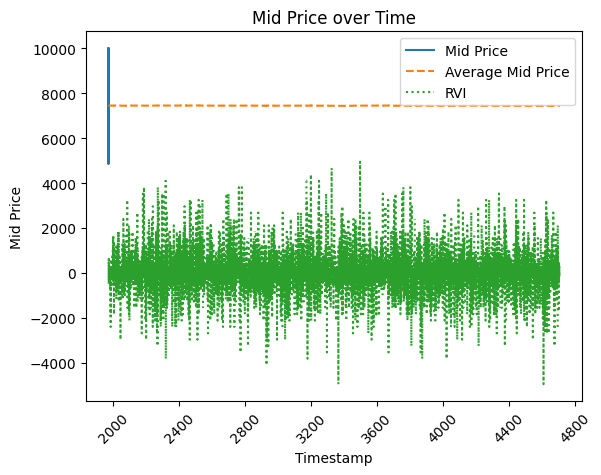

In [37]:
makegraphplot("C:\\Users\\leona\\Documents\\Coding the humanities\\Prosperity game\\island-data-bottle-round-1\\prices_round_1_day_0.csv")